In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json

In [2]:
principals_df = pd.read_csv("principals.csv")

In [3]:
principals_df

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"
...,...,...,...,...,...,...
14117,tt9285882,4,nm1080139,actress,\N,"[""Marco's Mum""]"
14118,tt9354944,1,nm2796745,actor,\N,"[""Phil""]"
14119,tt9354944,2,nm3381295,actress,\N,"[""Cate""]"
14120,tt9354944,3,nm0126284,actress,\N,"[""Jexi""]"


In [4]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error 
)         

OneHotEncoder()

In [5]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(principals_df[['category']])

In [6]:
principals_df[ohe.categories_[0]] = transformed.toarray()

In [7]:
principals_df

,tconst,ordering,nconst,category,job,characters,actor,actress
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",0.0,1.0
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",1.0,0.0
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",1.0,0.0
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",1.0,0.0
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]",0.0,1.0
...,...,...,...,...,...,...,...,...
14117,tt9285882,4,nm1080139,actress,\N,"[""Marco's Mum""]",0.0,1.0
14118,tt9354944,1,nm2796745,actor,\N,"[""Phil""]",1.0,0.0
14119,tt9354944,2,nm3381295,actress,\N,"[""Cate""]",0.0,1.0
14120,tt9354944,3,nm0126284,actress,\N,"[""Jexi""]",0.0,1.0


In [8]:
principals_df= principals_df.groupby("tconst").agg({'actor': sum,'actress': sum})


In [9]:
principals_df

,actor,actress
tconst,,
tt0035423,3.0,1.0
tt0118589,2.0,2.0
tt0120467,4.0,0.0
tt0120667,3.0,1.0
tt0120679,2.0,2.0
...,...,...
tt8772262,3.0,1.0
tt8946378,2.0,2.0
tt9134216,4.0,0.0


In [10]:
principals_df["actor_proportion"] = principals_df["actor"] / principals_df[["actor","actress"]].sum(axis=1)
principals_df["actress_proportion"] = principals_df["actress"] / principals_df[["actor","actress"]].sum(axis=1)

In [11]:
principals_df 

,actor,actress,actor_proportion,actress_proportion
tconst,,,,
tt0035423,3.0,1.0,0.75,0.25
tt0118589,2.0,2.0,0.50,0.50
tt0120467,4.0,0.0,1.00,0.00
tt0120667,3.0,1.0,0.75,0.25
tt0120679,2.0,2.0,0.50,0.50
...,...,...,...,...
tt8772262,3.0,1.0,0.75,0.25
tt8946378,2.0,2.0,0.50,0.50
tt9134216,4.0,0.0,1.00,0.00


In [12]:
principals_df["actor_prop"] = pd.cut(principals_df["actor_proportion"], bins=[0,0.499,0.5,1], labels=["Higher proportion of actresses", "Equal proportion of actors and actresses", "Higher proportion of actors"] )

principals_df

,actor,actress,actor_proportion,actress_proportion,actor_prop
tconst,,,,,
tt0035423,3.0,1.0,0.75,0.25,Higher proportion of actors
tt0118589,2.0,2.0,0.50,0.50,Equal proportion of actors and actresses
tt0120467,4.0,0.0,1.00,0.00,Higher proportion of actors
tt0120667,3.0,1.0,0.75,0.25,Higher proportion of actors
tt0120679,2.0,2.0,0.50,0.50,Equal proportion of actors and actresses
...,...,...,...,...,...
tt8772262,3.0,1.0,0.75,0.25,Higher proportion of actors
tt8946378,2.0,2.0,0.50,0.50,Equal proportion of actors and actresses
tt9134216,4.0,0.0,1.00,0.00,Higher proportion of actors


In [13]:
sorted(principals_df[principals_df.actor_prop == "Higher proportion of actresses"].actress_proportion )

[0.625,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75

In [14]:
movies_df = pd.read_csv("movies_cast_2.csv")

merged = pd.merge(principals_df, movies_df, left_on='tconst', right_on='tconst', how='left')


In [15]:
merged = merged[["startYear", "actor_prop"]]
merged.reset_index(drop = True)

,startYear,actor_prop
0,2001,Higher proportion of actors
1,2001,Equal proportion of actors and actresses
2,2000,Higher proportion of actors
3,2005,Higher proportion of actors
4,2002,Equal proportion of actors and actresses
...,...,...
3535,2019,Higher proportion of actors
3536,2019,Equal proportion of actors and actresses
3537,2019,Higher proportion of actors
3538,2019,Higher proportion of actors


In [16]:
merged.groupby(["startYear","actor_prop"])["actor_prop"].count()
# df.groupby('Name', sort=False)['Marks'].transform('sum')

startYear  actor_prop                              
2000       Higher proportion of actresses               11
           Equal proportion of actors and actresses     43
           Higher proportion of actors                  83
2001       Higher proportion of actresses               13
           Equal proportion of actors and actresses     44
           Higher proportion of actors                  95
2002       Higher proportion of actresses               13
           Equal proportion of actors and actresses     56
           Higher proportion of actors                  91
2003       Higher proportion of actresses               18
           Equal proportion of actors and actresses     50
           Higher proportion of actors                  87
2004       Higher proportion of actresses               14
           Equal proportion of actors and actresses     69
           Higher proportion of actors                  87
2005       Higher proportion of actresses               21
    

In [17]:
merged

,startYear,actor_prop
0,2001,Higher proportion of actors
1,2001,Equal proportion of actors and actresses
2,2000,Higher proportion of actors
3,2005,Higher proportion of actors
4,2002,Equal proportion of actors and actresses
...,...,...
3535,2019,Higher proportion of actors
3536,2019,Equal proportion of actors and actresses
3537,2019,Higher proportion of actors
3538,2019,Higher proportion of actors


In [18]:
merged[['actor_prop']]
       
ohe = OneHotEncoder()
transformed = ohe.fit_transform(merged[['actor_prop']])
merged[ohe.categories_[0]] = transformed.toarray()

In [19]:
merged = merged.drop(np.NaN, axis=1)
# (merged.actor_prop == np.NaN).value_counts()
merged[['actor_prop']].value_counts()

actor_prop                              
Higher proportion of actors                 1926
Equal proportion of actors and actresses    1208
Higher proportion of actresses               342
dtype: int64

<AxesSubplot:xlabel='startYear'>

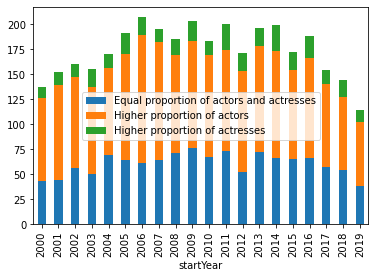

In [20]:
merged.groupby("startYear").sum().plot(kind='bar', stacked=True)

In [21]:
a = merged.groupby("startYear").sum()
b = a.copy()
b

,Equal proportion of actors and actresses,Higher proportion of actors,Higher proportion of actresses
startYear,,,
2000,43.0,83.0,11.0
2001,44.0,95.0,13.0
2002,56.0,91.0,13.0
2003,50.0,87.0,18.0
2004,69.0,87.0,14.0
2005,64.0,106.0,21.0
2006,61.0,128.0,18.0
2007,64.0,118.0,13.0
2008,71.0,98.0,16.0


In [22]:
# ["Higher proportion of actresses", "Equal proportion of actors and actresses", "Higher proportion of actors"]
b["Higher proportion of actresses"] = b["Higher proportion of actresses"]/ a.sum(axis=1)
b["Equal proportion of actors and actresses"]  = b["Equal proportion of actors and actresses"] / a.sum(axis=1)
b["Higher proportion of actors"]  = b["Higher proportion of actors"] / a.sum(axis=1)

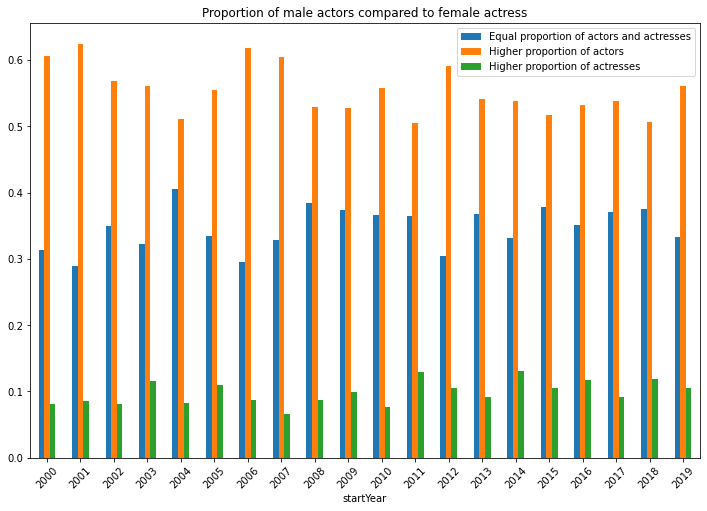

In [23]:
b.plot(kind='bar', stacked=False,figsize=(12,8)).legend(loc="upper right")
plt.title("Proportion of male actors compared to female actress")
plt.tick_params(axis='x', rotation=45)
plt.show()

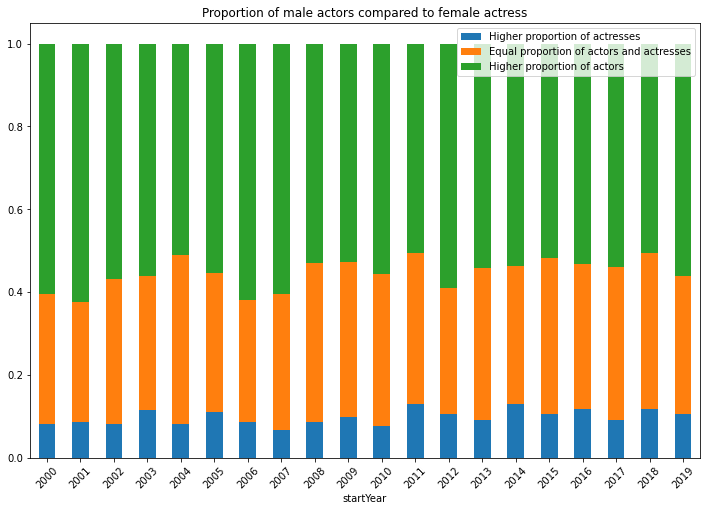

In [24]:
# order=["Higher proportion of female actors", "Equal proportion of male and female actors", "Higher proportion of male actors"] 
order = ["Higher proportion of actresses", "Equal proportion of actors and actresses", "Higher proportion of actors"]
b.columns = pd.CategoricalIndex(b.columns.values, 
                                 ordered=True, 
                                 categories=order)
b = b.sort_index(axis=1)

b.plot(kind='bar', stacked=True,figsize=(12,8)).legend(loc="upper right")
plt.title("Proportion of male actors compared to female actress")
plt.tick_params(axis='x', rotation=45)
plt.show()

In [25]:
principals_df.to_csv("cast_proportion.csv")


In [26]:
years = range(2000,2019+ 1)
year_labels = ["'"+str(y)[2:] for y in years]

year_labels_dict = dict(zip(years,year_labels ))
year_labels_dict

{2000: "'00",
 2001: "'01",
 2002: "'02",
 2003: "'03",
 2004: "'04",
 2005: "'05",
 2006: "'06",
 2007: "'07",
 2008: "'08",
 2009: "'09",
 2010: "'10",
 2011: "'11",
 2012: "'12",
 2013: "'13",
 2014: "'14",
 2015: "'15",
 2016: "'16",
 2017: "'17",
 2018: "'18",
 2019: "'19"}

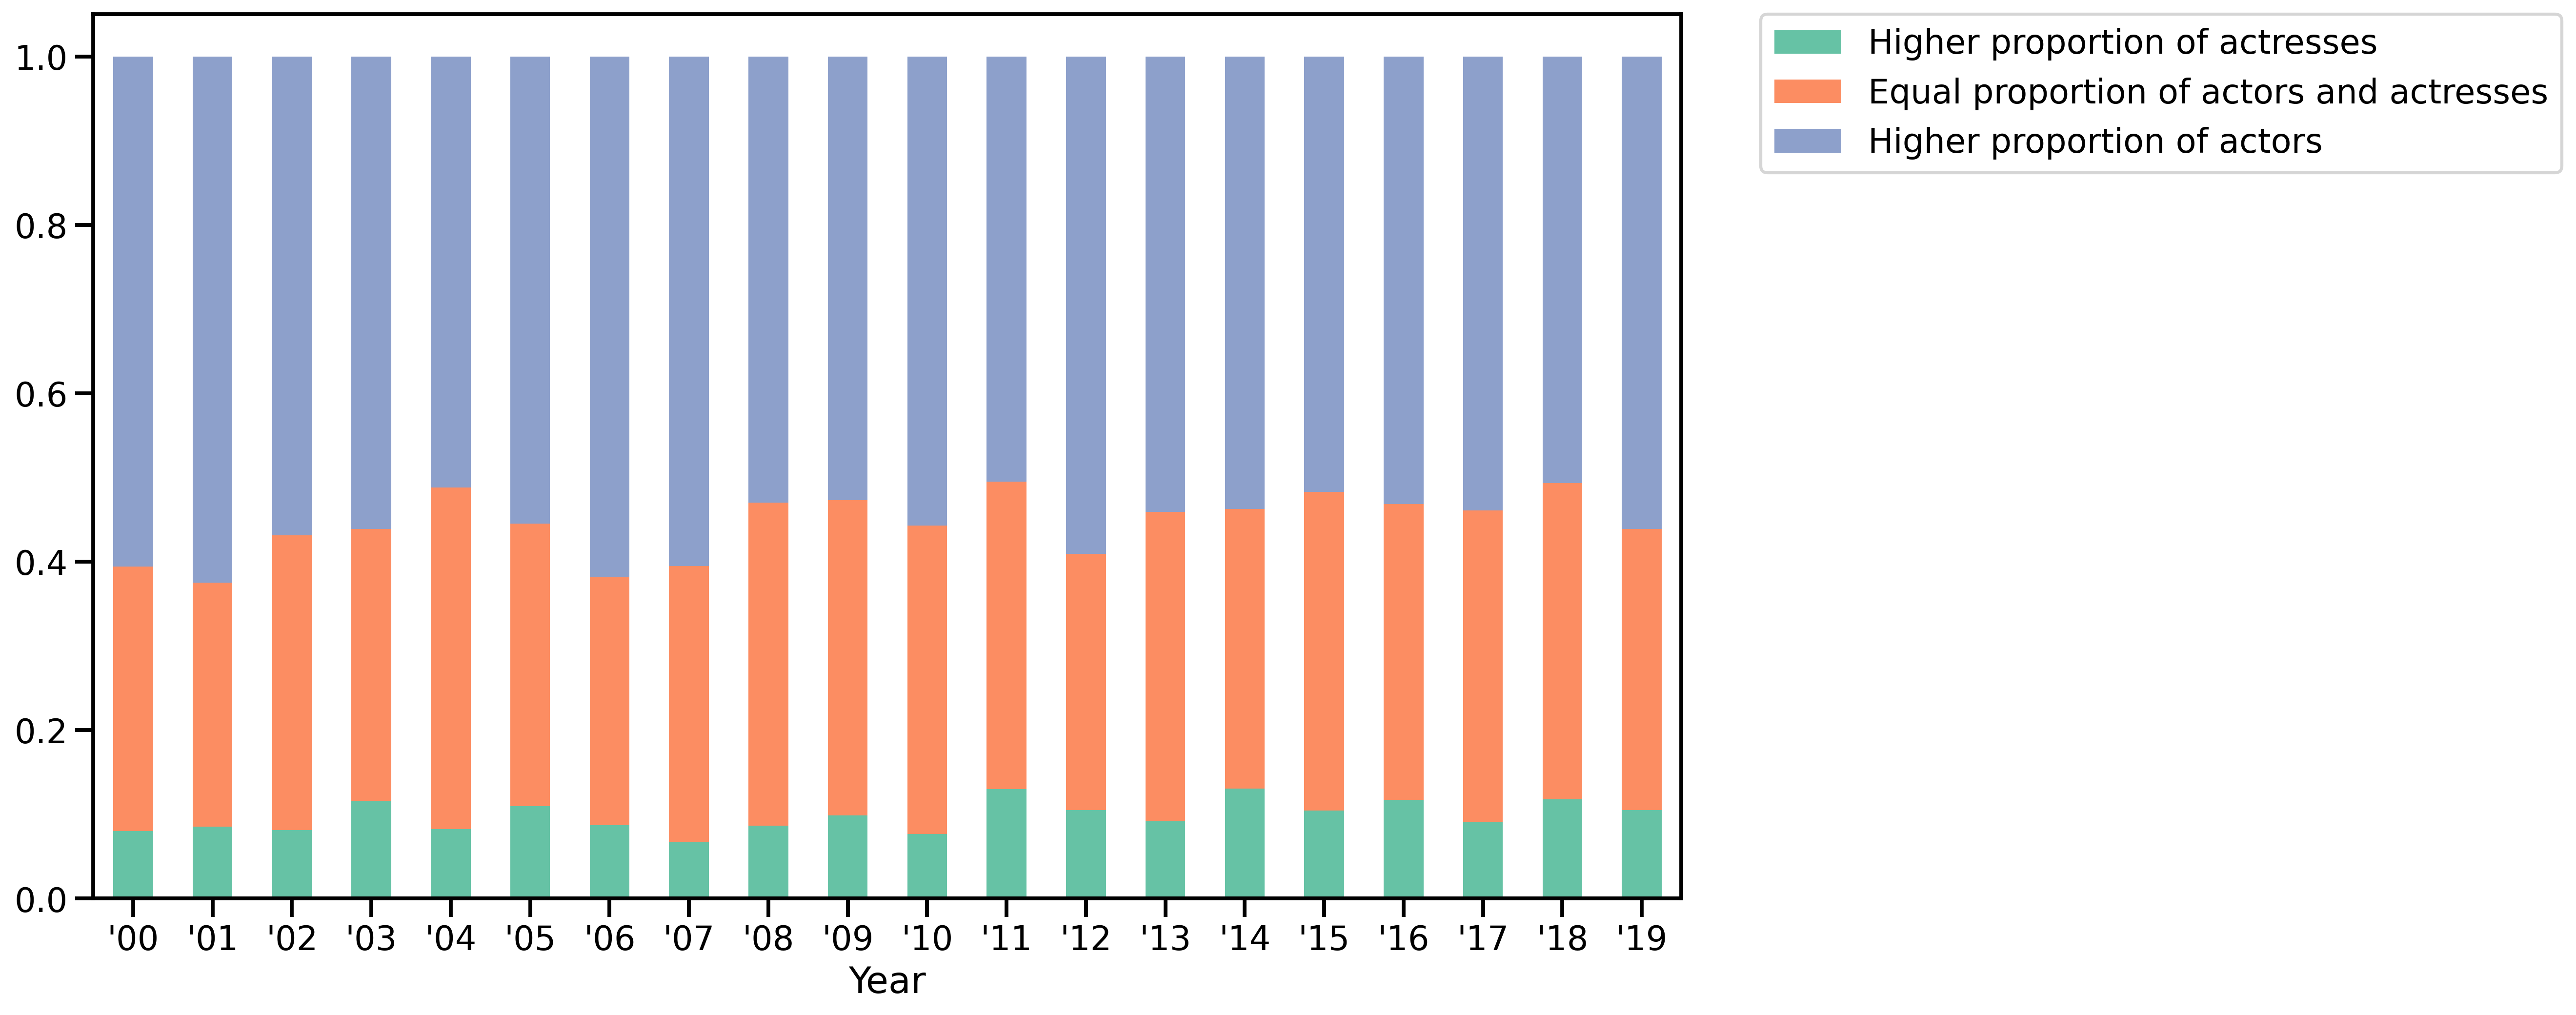

In [33]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
# b.plot(kind='bar', stacked=True,figsize=(12,8)).legend(loc="best")
# # plt.title("Proportion of male actors compared to female actress")
# sns.set_palette("PuBuGn_d")
colors = sns.color_palette("Set2", n_colors=3)
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
# plt.xlabel("Year")
sns.set_context("talk")
ax = b.plot(kind='bar', colormap=cmap1, stacked=True) #,figsize=(12,8)).legend(loc="best")

plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
plt.xticks(range(0,20),year_labels)
plt.tick_params(rotation=0)
# ax.figure(dpi= 1200 )
ax.figure.set_size_inches(14, 8)

plt.show()